x_1 = 2.000000
x_2 = 0.614862
x_3 = 0.911249
x_4 = 0.995599
x_5 = 0.999975


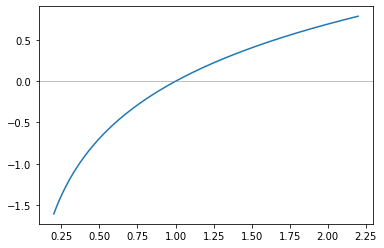

In [5]:
import numpy as np
from scipy.misc import derivative

x_n = 2
x = np.linspace(0.2, 2.2, 500)

def f(x):
    return np.log(x)

def x_next(f, x, x_n):
    slope = derivative(f, x_n, dx=0.1)
    return x_n - f(x_n) / slope

for n in range(5):
    print('x_{} = {:.6f}'.format(n + 1, x_n))
    x_n = x_next(f, x, x_n)
    
    
plt.plot(x, f(x), label=r'$\ln(x)$')
plt.axhline(0, color='gray', lw=0.5)
plt.setp(ax, xticks=[0, 1, 2], xticklabels=['0', '1', '2'],
             yticks=[-1, 0, 1], yticklabels=['-1', '0', '-1'])
plt.show()

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt
from ipywidgets import widgets

x = np.linspace(0.2, 2.2, 500)

def f(x):
    return np.log(x)

def f_line(f, x, x_n):
    slope = derivative(f, x_n, dx=0.1)
    x_nn = x_n - f(x_n) / slope 
    return slope * (x - x_n) + f(x_n), x_nn

def update_plot(order):
    x_n = 2
    ax.clear()
    plt.plot(x, f(x), label=r'$\ln(x)$')
    plt.axhline(0, color='gray', lw=0.5)

    for i in range(0, order):

        if i >= 1:
            ax.plot(x, f_l, '--', lw=1)
        
        plt.plot(x_n, f(x_n), 'kd', label=r'$f(x_{}={:.2f})={:.3f}$'.format(i + 1, x_n, f(x_n)))
        plt.vlines(x_n, 0, f(x_n), color='black', linestyle=':', lw=1)
        f_l, x_n = f_line(f, x, x_n)

        
    plt.setp(ax, xticks=[0, 1, 2], xticklabels=['0', '1', '2'],
             yticks=[-1, 0, 1], yticklabels=['-1', '0', '-1'])
    ax.set_ylim(-1, 1)
    ax.set_xlim(0, 2.2)
    plt.legend(loc=4)
    plt.show()

In [4]:

order = widgets.IntSlider(min=1, max=6, value=1, description='order')
widgets.interactive(update_plot, order=order)

interactive(children=(IntSlider(value=1, description='order', max=6, min=1), Output()), _dom_classes=('widget-…